# CS 430 Homework 2
This notebook is used to explore the Iris and Housing datasets, as well as answer questions relating to them. 


In [0]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [0]:
import requests, zipfile, io
r = requests.get("https://www.cs.siu.edu/~carver/cs434/hw2-original.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

First, we need to turn the data into something useable.

In [0]:
housingpath = "housing.data"
irispath = "iris.data"

def data_to_csv(path):
    with open(path) as input_file:
        lines = input_file.readlines()
        newLines = []
        for line in lines:
            newLine = line.strip().split()
            newLines.append(newLine)
        return pd.DataFrame(newLines)
    
        


housing = data_to_csv(housingpath)
iris = pd.read_csv(irispath, header=None)

In [0]:
housingcol = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
iriscol = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
housing.columns = housingcol
iris.columns = iriscol

# Iris Data:

In [0]:
iris.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


First, let's focus on the Iris Dataset. We need to split the data before running algorithms on it.

In [0]:
Y = iris.Class.values
iris=iris.drop("Class", axis = 1)
X = iris.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 3)

Now that the data is split, we can start to run the decision tree on it.
(a) Run C5.0/See5 on the Iris dataset using the algorithm defaults. Draw the decision
tree produced by C5.0/See5
Scikit learn uses CART, an opitimized version of C4.5. This may result in some data being different than what would be outputted from directly running C5.0

In [0]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### (a) Run C5.0/See5 on the Iris dataset using the algorithm defaults. Draw the decision tree produced by C5.0/See5.

[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.8400000000000

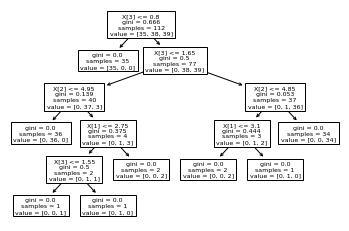

In [0]:
tree.plot_tree(dtc) 

### (b) What is the overall performance of the resulting DT on the training data (in terms of error rate)? I.e., how well does the DT predict the correct iris?

In [0]:
from sklearn.metrics import accuracy_score
pred = dtc.predict(X_test)
accuracy_score(y_test, pred) * 100

97.36842105263158

### (c) Lookup the term confusion matrix on Wikipedia, and find it in the results of your training. What does the confusion matrix tell you about how errors are distributed among the various classes?


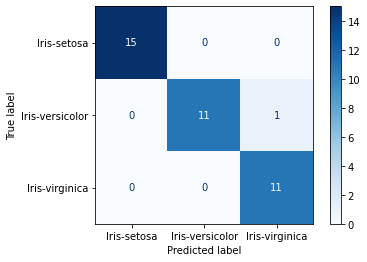

In [0]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dtc, X_test, y_test,
                            cmap=plt.cm.Blues)

plt.show()

What this tells us is that the model was mostly accurate, with only 2 cases fooling the model. 



### (d) Were all four Iris data attributes found to be equally useful? If not, which are most useful? Explain

In [0]:
iriscol.remove("Class")
print(pd.Series(dtc.feature_importances_, index = [iriscol]))
iriscol.append("Class")

Sepal Length    0.000000
Sepal Width     0.024579
Petal Length    0.062510
Petal Width     0.912910
dtype: float64


As shown, the most useful class was Petal Width, and Sepal Length having no effect on the model whatsoever. 

### (e) The error rate is likely not zero (i.e., not 100% correct classification). Does that mean that decision tree learning has “failed?” Explain.

No. This means that the decision tree was successful. Although this data set is somewhat small, having 100% correct classification could mean that the model is overfitting. As such, it is good that the model has some error, as it means it is learning properally.

### (f) Now run C5.0/See5 but disable global pruning (e.g., -g option). Draw the decision tree that was obtained with pruning disabled.

There are no pruning options avaliable on scikit learn. However, some options we can use to lower the size of the tree include changing the criterion and the max_depth. 

In [0]:
gini = tree.DecisionTreeClassifier(criterion='gini')
gini.fit(X_train, y_train)
pred = gini.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred) * 100)

entropy = tree.DecisionTreeClassifier(criterion='entropy')
entropy.fit(X_train, y_train)
pred = entropy.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred) * 100)

Criterion=gini 97.36842105263158
Criterion=entropy 94.73684210526315


Here we can see that entropy had the highest score. Let's tweak this model slightly more by reducing it's depth. In order to find the right depth, let's iterate to see which ones have the highest accuracy

In [0]:
print("==ENTROPY==")
for i in range(1,10):
    entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    entropy.fit(X_train, y_train)
    pred = entropy.predict(X_test)
    print('Criterion=entropy', accuracy_score(y_test, pred) * 100)
    

==ENTROPY==
Criterion=entropy 68.42105263157895
Criterion=entropy 94.73684210526315
Criterion=entropy 97.36842105263158
Criterion=entropy 97.36842105263158
Criterion=entropy 97.36842105263158
Criterion=entropy 94.73684210526315
Criterion=entropy 94.73684210526315
Criterion=entropy 97.36842105263158
Criterion=entropy 94.73684210526315


With a depth of 3, we are able to reach 97% accuracy. This makes sense since our tree was not big anyway. 

In [0]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 543)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=543, splitter='best')

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

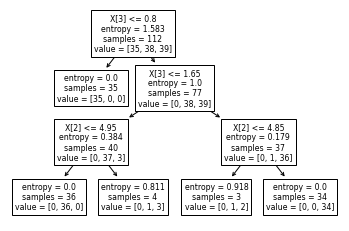

In [0]:
tree.plot_tree(dtc)

Now that we have verified the depth , we can change the max num of leaf nodes, and the min_sample leaf. Let's do testing there.

In [0]:
items = []
for i in range(2,10):
    for j in range(2,10):
        maxleaf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, max_leaf_nodes=i, min_samples_leaf = j)
        maxleaf.fit(X_train, y_train)
        pred = maxleaf.predict(X_test)
        item = [i,j, accuracy_score(y_test, pred) * 100]
        items.append(item)
items = pd.DataFrame.from_records(items, columns = ["Max_Leaf", "Min_Samples", "Accuracy"])
items["rank"] = items["Accuracy"].rank(method='max')
items.sort_values(by="rank", ascending = False).head(20)


,Max_Leaf,Min_Samples,Accuracy,rank
32,6,2,97.368421,64.0
49,8,3,97.368421,64.0
40,7,2,97.368421,64.0
26,5,4,97.368421,64.0
25,5,3,97.368421,64.0
24,5,2,97.368421,64.0
41,7,3,97.368421,64.0
42,7,4,97.368421,64.0
18,4,4,97.368421,64.0
17,4,3,97.368421,64.0


With our tests, we can choose which model would be best for us. 

In [0]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, max_leaf_nodes=6, min_samples_leaf = 2, random_state = 69)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=69, splitter='best')

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

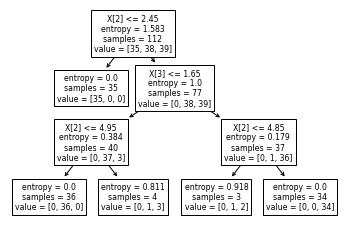

In [0]:
tree.plot_tree(dtc)

In [0]:
pred = dtc.predict(X_test)
accuracy_score(y_test, pred) * 100

97.36842105263158

### (g) How did this affect the decision tree and error rate on the training data?

Pruning is used generally to reduce the size of our decision tree. However, since the size of our tree was already small, it had little effect on the accuracy. We also extensively tested which settings were the best, since there were no built in pruning options for scikit learn.

### (h) So is C5.0/See5’s global pruning good or bad for the DT for the Iris data?

Overall, pruning has very little impact on the dataset. This was shown by how little the accuracy changed throughout testing (It would constantly stay at 94 or 97% once it reached a certain threshhold). This may work for much bigger datasets, but for the Iris dataset it is not impactful.

### (i) As has been covered extensively in the course, what we care about ultimately is how learned models perform on additional, out-of-sample data, i.e., Eout. A standard method for estimating out-of-sample performance is cross validation. C5.0See5 can automatically run cross validation testing (e.g., -X option). Run cross validation (with default pruning) using a folds argument of 3. Draw the resulting three decision trees.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

crossval = tree.DecisionTreeClassifier()

score = cross_validate(crossval, X_train, y_train, cv=3)
score

{'fit_time': array([0.00105882, 0.00085235, 0.00077987]),
 'score_time': array([0.00066376, 0.00068283, 0.00049329]),
 'test_score': array([0.94736842, 0.97297297, 0.91891892])}

Sklearn does not provide the ability to draw each individual tree. However, we can look at the average accuracy across all 3 tests. 

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score["test_score"].mean(), score["test_score"].std() * 2))

Accuracy: 0.95 (+/- 0.04)


### (j) Explain why the trees differ, and why they differ from the DT you drew for problem 1(a).

Looking at the scores, we can see that the accuracy is varied. This is caused by the fact that each fold uses slightly different data each time, as well as slightly different parameters. As such, each tree will be different

### (k) Now rerun cross validation with a folds argument of 5. What do you see about the performance of each of the five DTs, and what does this tell you about the size of training datasets for this problem?

In [0]:
crossval = tree.DecisionTreeClassifier()

score = cross_validate(crossval, X_train, y_train, cv=5)
score

{'fit_time': array([0.00113463, 0.00086498, 0.00110102, 0.00111985, 0.00091434]),
 'score_time': array([0.00069833, 0.0017705 , 0.00049973, 0.00064969, 0.00074697]),
 'test_score': array([0.95652174, 0.91304348, 0.95454545, 1.        , 0.81818182])}

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score["test_score"].mean(), score["test_score"].std() * 2))

Accuracy: 0.93 (+/- 0.12)


This tells us that while the average accuracy does not change across this dataset, as the folds continue the accuracy gets worse. This may be caused by overfitting at first, then trying to compensate and underfit as a result. Either way, it can be concluded that having a folds argument of 5 is the best way to go about this. 

### (l) Decision trees can often be used to classify instances even with limited information about the instances (i.e., knowing values for only a subset of the attributes). What iris class could you best predict with incomplete attribute information, and which attributes’ values would you need to make a prediction?


To solve this, we should look at what features are correlated, and see if one has more weight. By finding that, we can see which features could exclusively be used to predict.

In [0]:
iris = pd.read_csv(irispath, header=None)
iris.columns = iriscol

#Uses Pandas built-in functions to get all of the new columns for each label in our one column. 
dummies = pd.get_dummies(iris.Class)

#Add new column to the dataframe
iris = pd.concat([iris, dummies], axis = 1)

#Drop the old column
iris.drop(["Class"], axis = 1, inplace=True)

iris.head(3)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


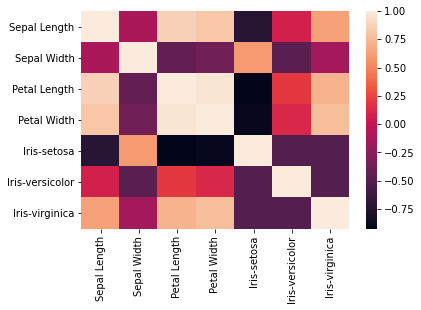

In [0]:
import seaborn as sns
fig = plt.figure()
ax = plt.subplot(111)
corr = iris.corr()
ax = sns.heatmap(corr)
plt.show()

In [0]:
corr.loc["Iris-setosa", :].sort_values(ascending=False)

Iris-setosa        1.000000
Sepal Width        0.603348
Iris-versicolor   -0.500000
Iris-virginica    -0.500000
Sepal Length      -0.717416
Petal Width       -0.887344
Petal Length      -0.922765
Name: Iris-setosa, dtype: float64

In [0]:
corr.loc["Iris-versicolor", :].sort_values(ascending=False)

Iris-versicolor    1.000000
Petal Length       0.201754
Petal Width        0.117899
Sepal Length       0.079396
Sepal Width       -0.467703
Iris-setosa       -0.500000
Iris-virginica    -0.500000
Name: Iris-versicolor, dtype: float64

In [0]:
corr.loc["Iris-virginica", :].sort_values(ascending=False)

Iris-virginica     1.000000
Petal Width        0.769445
Petal Length       0.721011
Sepal Length       0.638020
Sepal Width       -0.135645
Iris-versicolor   -0.500000
Iris-setosa       -0.500000
Name: Iris-virginica, dtype: float64

Looking at this, we can see that Petal Width has the highest correlation for Viginica, and second highest for Versicolor. Petal Width also had the highest inverse correlation with Setosa, which could be useful to determine what it isnt. As for what classes need more features, it is highly likely that Iris-Versicolor needs all the features, as each of the features individually have low correlation. 

# Housing data:

### (a) Use M5PrimeLab to train several model trees with the Housing data, using five or more different parameter settings. Begin with: m5pparams(true,2,5). Try to change the minLeafSize and minParentSize parameters so as to reduce the number of rules produced. Do not enable agressivePruning here (but regular pruning is on by default) Give a list showing the parameters used and the number of rules that result.

In [0]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()

While there is no agressive prunning in sklearn, we can change the number of samples for a leaf (in essense the leaf size). 

In [0]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [0]:
y = housing.MEDV.values
h = housing.drop("MEDV", axis = 1)
x = h.values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 69)

Instead of using for loops to test every instance, we can use Sklearn's GridSearchCV to determine the best parameters. Let's create a parameter grid and then test it.

In [0]:
reg.fit(x_train, y_train)
print("Score={}".format(reg.score(x_test,y_test)))


Score=0.7633384451938885


Now that we have a basic model down, we can create a grid of parameters we want to test, and use GridSeach Cross Validation to determine the best model. We will start with 3 folds and then move to 5, then 10, similar to how we tested our model last time

In [0]:
from sklearn.model_selection import GridSearchCV

def gridtest(folds): 
    print("===={} FOLDS====".format(folds))
    param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 30, 40, 50],
              "max_depth": [2, 4, 6, 8, 10],
              "min_samples_leaf": [20, 40, 60, 80, 100],
              "max_leaf_nodes": [5, 20, 50, 75, 100]
              }
    
    gridreg = GridSearchCV(reg, param_grid, cv=folds)

    gridreg.fit(x_train, y_train)
    
    print("Score:{}".format(gridreg.best_score_))
    print("Best Hyperparameters::\n{}".format(gridreg.best_params_))
    df = pd.DataFrame(data=gridreg.cv_results_)
    df = df.drop_duplicates(subset=['param_max_depth', 'mean_test_score', 'param_max_leaf_nodes'], keep='last')
    print("\n")
    return df
    
    

In [0]:
r3 = gridtest(3)
r5 = gridtest(5)
r10 = gridtest(10)

====3 FOLDS====
Score:0.6371766888616998
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


====5 FOLDS====
Score:0.706969325115044
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


====10 FOLDS====
Score:0.7208106775275758
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}




Using GridSearchCV, we were able to see the best combination of these 5 parameters. Surprisingly, each cv returned the same parameter, with the only exception being the criterion we used. 

### (b) What do your results show about the relationship between minLeafSize and minParentSize and the number of rules. Does this this makes sense? Explain.

In [0]:
reg = r10
col = ["param_max_depth", "param_max_leaf_nodes", "param_min_samples_leaf", "param_min_samples_split", 'mean_test_score']
reg = reg[col].sort_values("mean_test_score", ascending=False)
reg

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,mean_test_score
553,10,50,20,40,0.720811
353,6,100,20,40,0.720811
303,6,50,20,40,0.720811
528,10,20,20,40,0.720811
403,8,20,20,40,0.720811
...,...,...,...,...,...
597,10,75,100,30,0.459310
545,10,20,100,10,0.459310
522,10,5,100,30,0.459310
320,6,50,100,10,0.459310


The parameters we were looking towards were how number of samples affects performance. Takin a look at the 10 fold, we can see that all the top performers have low samples. This means that the smaller the minLeafSize is, the better it will perform on the boston housing data.

### (c) Repeat the problem 2(a), but now enable agressivePruning. This can be done by doing something like: m5pparams(true,2,5,true,0,0.05,true). Again, give a list showing the parameters used and the number of rules that result.

Unfortunetly, due to sklearn's tree parameters, we cannot agressively prune the tree. However, based on our GridSearchCV, we can see that size of the tree has little effect on the performance. Thus, we can assume that agressively prunning the data in terms of depth will have no effect. As stated above, the Number of Samples for the model has the most effect on performance, and so a combination of low samples and low depth will result in the most accurate tree. This makes sense, as Pruning is used to reduce the tree size while maximising performance. 

### (d) Pick one of your smaller model tree rulesets, and write down rules for the first four outputs (y-values) that were produced. If there are no linear equations in these first four rules, also write down the first rule that lead to a linear equation (or show one from a larger tree). 


In [0]:
reg = DecisionTreeRegressor(criterion = 'mse', max_depth = 6, max_leaf_nodes= 20, min_samples_leaf=20, min_samples_split=10)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


### (e) Draw the model tree represented by the rules you wrote in the previous proble, i.e., convert the rules to a decision tree. (One of the advantages of DTs is that trees can be represented as rules, and vice versa. Sometimes one is a better representation and sometimes the other is.)

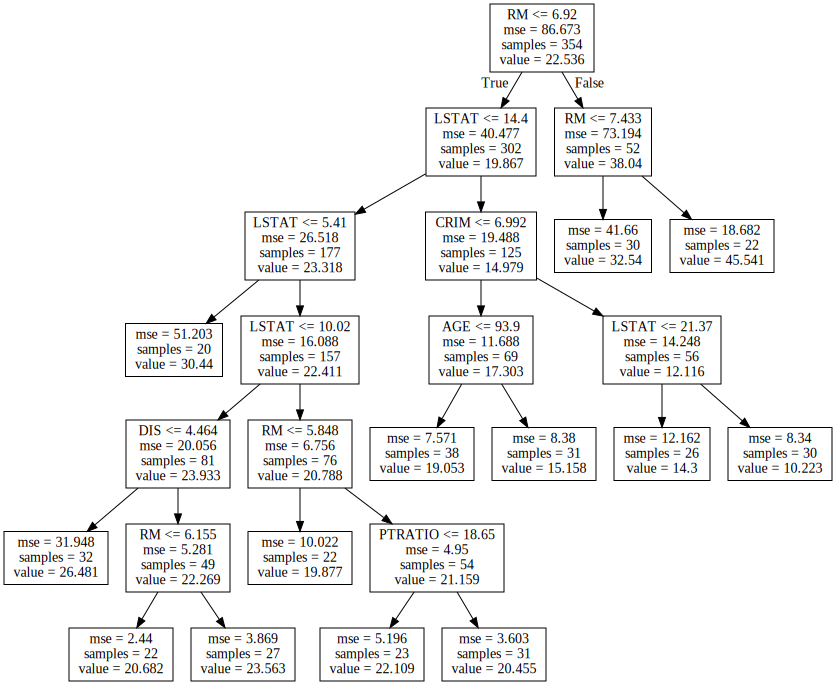

In [0]:
from sklearn.tree import export_graphviz  
import graphviz
housingcol.remove("MEDV")
data = export_graphviz(reg, out_file =None, 
            feature_names =housingcol)
housingcol.append("MEDV")
graph = graphviz.Source(data)
graph


### (f) A key reason why DTL has risen again in popularity is the fact that rule or treeoutput is understandable by humans. Explain in English what the patterns are that are represented by the rules you wrote down for problem 2(d).

### (g) In a model tree, some leaves may be constants and some may be linear equations. Using your rules from 2(d), explain why this is.

As mentioned earlier, the pattern here is that as long as the number of samples is low, the performance increases. When we look at this pattern in terms of features, the key features to look out for are RM and LSTAT (as evidenced by those features frequency in the decision tree). The model has determined that as RM goes down, the sample number goes down, meaning performance goes up. This has a directly linear correlation. 

### (h) Rule size is a key issue if humans are to read and understand DTL output, but ultiamtely we care about how the learned tree/rules perform. An M5PrimeLab model’s performance on the training data (i.e., Ein) can be determined using the m5ptest() function. The function will produce these performance/error statistics: 

### • MAE: Mean Absolute Error
### • MSE: Mean Squared Error
### • RMSE: Root Mean Squared Error
### • RRMSE: Relative Root Mean Squared Error
### • R2: Coefficient of Determination

### For this problem, rerun two of your parameter sets from problem 2(a) that resulted in fairly different numbers of resulting rules, and show the output from m5ptest() for each.

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
def m5ptest(max_depth, max_leaf, min_samples, min_split):
    test1 = DecisionTreeRegressor(max_depth = max_depth, 
                                  max_leaf_nodes= max_leaf, 
                                  min_samples_leaf=min_samples, 
                                  min_samples_split=min_split)
    test1.fit(x_train, y_train)

    pred = test1.predict(x_test)

    print("MAE: {}".format(mean_absolute_error(y_test, pred)))
    print("MSE: {}".format(mean_squared_error(y_test, pred)))
    print("RMSE: {}".format(sqrt(mean_squared_error(y_test, pred))))
    print("R2: {}".format(test1.score(x_test, y_test)))
    
    return test1



### (i) Evaluate the testing output shown in the previous problem, and discuss the relationship you found between the number of rules in a model tree and in-sample performance.

In [0]:
m5ptest(10, 75, 20, 40)
print("\n")
m5ptest(6, 20, 100, 10)

MAE: 2.9996778918203777
MSE: 22.371655631875274
RMSE: 4.729868458200003
R2: 0.7174287862666112


MAE: 4.693137661862991
MSE: 41.81719870861068
RMSE: 6.466621893122458
R2: 0.47181662419358783


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

As noted, the model with higher number of samples did worse. There was no difference in the number of rules, only variance in types.

### (j) Take the parameters from one example used in 2(h), enable agressivePruning, and then get performance stats using m5ptest(). Write down your results, and discuss how aggressive pruning affected rule/tree size and in-sample performance.

As mentioned, we cannot agressive prune. However, we can lower the size of the tree even more, and see how that affects the model.

In [0]:
reg = m5ptest(5, 10, 1, 2)

MAE: 3.249960861304729
MSE: 21.763415186103362
RMSE: 4.6651275637546465
R2: 0.7251113308145714


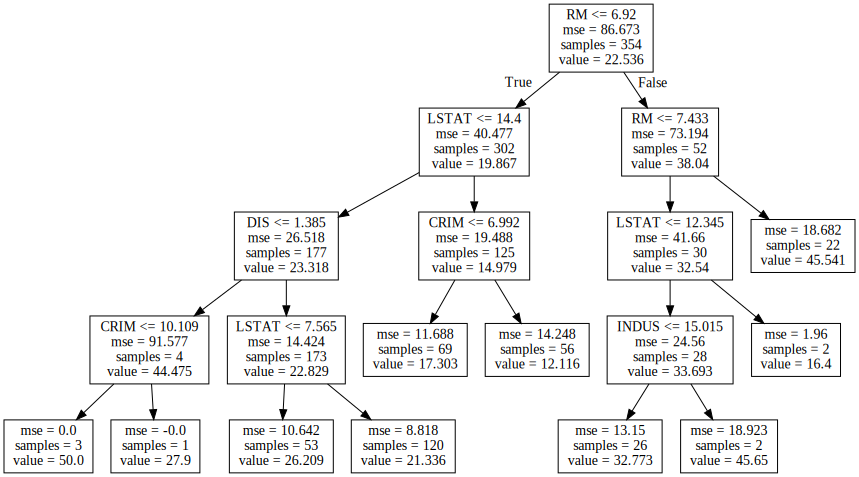

In [0]:
housingcol.remove("MEDV")
data = export_graphviz(reg, out_file =None, 
            feature_names =housingcol)
housingcol.append("MEDV")
graph = graphviz.Source(data)
graph


As shown, the size of the tree is far smaller than above, and is able to get better results. This means that a smaller tree is able to positively impact performance.

### (k) So far we have looked at performance on the training data (Ein), but our ultimate concern is of course Eout. M5PrimeLab can perform cross validation with its m5pcv() function. (Note that m5pcv() use seems somewhat unnecessarily difficult to use, so you will probably have to spend some time figuring it out—look at the M5PrimeLab manual!)
### For this problem, rerun the two parameter sets you used in problem 2(h), figure out how to run 10-fold cross validation (the default k value) on each of them using m5pcv(), and show the performance outputs from m5pcv() for each.

In [0]:
crossval = DecisionTreeRegressor(max_depth = 10, 
                                  max_leaf_nodes= 75, 
                                  min_samples_leaf=20, 
                                  min_samples_split=40)

score = cross_validate(crossval, x_train, y_train, cv=10)

print("Accuracy(First Set): %0.2f (+/- %0.2f)" % (score["test_score"].mean(), score["test_score"].std() * 2))

crossval = DecisionTreeRegressor(max_depth = 6, 
                                  max_leaf_nodes= 20, 
                                  min_samples_leaf=100, 
                                  min_samples_split=10)

score = cross_validate(crossval, x_train, y_train, cv=10)


print("Accuracy(Second Set): %0.2f (+/- %0.2f)" % (score["test_score"].mean(), score["test_score"].std() * 2))


Accuracy(First Set): 0.72 (+/- 0.28)
Accuracy(Second Set): 0.46 (+/- 0.23)


### (l) Discuss the results from cross validation in the previous problem. In particular, how does estimated out-of-sample performance change with the number of rules? Is there evidence that the larger rule set suffered from overfitting? Explain.

### (m) Experiment with different parameters sets and use cross validation to try to come up with smallest possible ruleset with “good” out-sample performance. Provide details of your best choice: parameters, number of rules that result, in-sample performance, and cross validation estimate of out-sample performance.


Thoughout this notebook, we have experimented with different parameter sets. GridSearchCV took a large variety of different sets and used it to come up with the best choice based on it's options. However, despite that, we found that the options that were provided were very inaccurate, and that the best model was one who's parameters weren't even considered (This was due to depth and min samples being too high). This model did not suffer from overfitting, as it did not ever reach 100% accuracy. The performance generated by CV was very similar to what was generated with in-sample data, however the variance was much larger. 